C2SB2109 山口洋成

In [246]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

地球、木星、太陽の三体問題

In [282]:
G=6.6743*(10**-11)*((24*60*60)**2)*10**-24
m1=1.9891*10**30
m=[G*m1,G*m1*3.0404*10**-6,G*m1*0.0009546]

print(m)

def F(n,r,l):
    return -1*m[n-1]*(r[n]-r[n-1])/(np.sqrt((r[n]-r[n-1])**2+(l[n]-l[n-1])**2))**3-1*m[n-2]*(r[n]-r[n-2])/(np.sqrt((r[n]-r[n-2])**2+(l[n]-l[n-2])**2))**3

def xv(t,r0):
    x0,vx0,x1,vx1,x2,vx2,y0,vy0,y1,vy1,y2,vy2=r0
    x=[x0,x1,x2]
    y=[y0,y1,y2]
    
    dydt=[vx0,F(0,x,y),
          vx1,F(1,x,y),
          vx2,F(2,x,y),          
          vy0,F(0,y,x),
          vy1,F(1,y,x),
          vy2,F(2,y,x)
          ]
    return dydt

sq2=np.sqrt(2)

x0=(0,0,
    1496,0,
    7780,0,
    0,0,
    0,30*24*60*60*10**-5,
    0,13.07*24*60*60*10**-5
    )


sol = solve_ivp(xv, t_span=(0, 365.25*11.6), y0=x0,t_eval=np.linspace(0,365.25*11.6,100),rtol = 1.e-6)

print(sol)

[991036.9018644477, 3.0131485964286666, 946.0438265198018]
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.280e+01 ...  4.194e+03  4.237e+03]
        y: [[ 0.000e+00  1.549e-02 ...  1.478e-01  7.483e-02]
            [ 0.000e+00  7.209e-04 ... -2.029e-03 -1.387e-03]
            ...
            [ 0.000e+00  4.830e+02 ... -1.475e+03 -9.987e+02]
            [ 1.129e+01  1.127e+01 ...  1.107e+01  1.119e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2108
     njev: 0
      nlu: 0


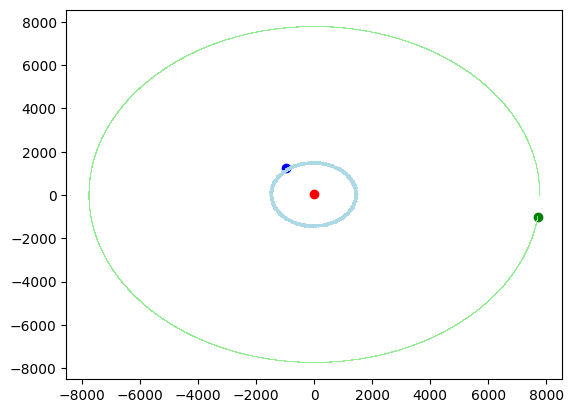

In [283]:
# Animation setup
fig, ax = plt.subplots()

ims = []
abs_max=[]
for i in range(len(sol.t)):
    im4 = ax.plot(sol.y[2],sol.y[8],color="lightblue",lw=0.1)
    im5=  ax.plot(sol.y[4],sol.y[10],color="lightgreen",lw=0.1)
    im1 = ax.scatter(sol.y[0][i],sol.y[6][i],color="red")
    im2 = ax.scatter(sol.y[2][i],sol.y[8][i],color="blue")
    im3 = ax.scatter(sol.y[4][i],sol.y[10][i],color="green")

    ims.append([im1,im2,im3])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
HTML(ani.to_jshtml())

赤・太陽、水色・地球、緑・木星、単位10万km

木星が一周公転する間に地球は約11.5周公転している

これは木星の公転周期がおよそ11.6年であることとおおむね一致する

In [264]:
G=6.6743*(10**-11)*((24*60*60)**2)*10**-24
m1=1.9891*10**30
m=[G*m1,G*m1*3.0404*10**-6]
tlist=[]
print(m)

def F(n,r,l):
    return -1*m[n-1]*(r[n]-r[n-1])/(np.sqrt((r[n]-r[n-1])**2+(l[n]-l[n-1])**2))**3

def xv(t,r0):
    tlist.append(t)
    x0,vx0,x1,vx1,y0,vy0,y1,vy1=r0
    x=[x0,x1]
    y=[y0,y1]
    dydt=[vx0,F(0,x,y),
          vx1,F(1,x,y),
          vy0,F(0,y,x),
          vy1,F(1,y,x)]
    return dydt

sq2=np.sqrt(2)

x0=(0,0,
    1496,0,
    0,0,
    0,30*24*60*60*10**-5)

print(sol)

sol = solve_ivp(xv, t_span=(0, 365), y0=x0,t_eval=np.linspace(0,365,365),rtol = 1.e-6)

[991036.9018644477, 3.0131485964286666]
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.003e+00 ...  3.640e+02  3.650e+02]
        y: [[ 0.000e+00  6.769e-07 ...  5.567e-05  4.410e-05]
            [ 0.000e+00  1.350e-06 ... -1.220e-05 -1.087e-05]
            ...
            [ 0.000e+00  2.599e+01 ... -2.349e+02 -2.092e+02]
            [ 2.592e+01  2.592e+01 ...  2.560e+01  2.567e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 200
     njev: 0
      nlu: 0


In [266]:
print(tlist)

[0.0, np.float64(0.0005353053742937474), np.float64(0.0032255168962195867), np.float64(0.00483827534432938), np.float64(0.012902067584878347), np.float64(0.014335630649864829), np.float64(0.016127584481097933), np.float64(0.016127584481097933), np.float64(0.048382753443293805), np.float64(0.06451033792439173), np.float64(0.14514826032988143), np.float64(0.15948389097974625), np.float64(0.17740342929207728), np.float64(0.17740342929207728), np.float64(0.499955118914036), np.float64(0.6612309637250153), np.float64(1.467610187779912), np.float64(1.6109664942785602), np.float64(1.7901618774018706), np.float64(1.7901618774018706), np.float64(3.4707677816348954), np.float64(4.311070733751407), np.float64(8.512585494333969), np.float64(9.259521451770869), np.float64(10.193191398566995), np.float64(10.193191398566995), np.float64(12.564562502953633), np.float64(13.750248055146953), np.float64(19.678675816113547), np.float64(20.732618529174275), np.float64(22.050046920500186), np.float64(22.050

[0.0, np.float64(0.0005353053742937474), np.float64(0.0032255168962195867), np.float64(0.00483827534432938), np.float64(0.012902067584878347), np.float64(0.014335630649864829), np.float64(0.016127584481097933), np.float64(0.016127584481097933), np.float64(0.048382753443293805), np.float64(0.06451033792439173), np.float64(0.14514826032988143), np.float64(0.15948389097974625), np.float64(0.17740342929207728), np.float64(0.17740342929207728), np.float64(0.499955118914036), np.float64(0.6612309637250153), np.float64(1.467610187779912), np.float64(1.6109664942785602), np.float64(1.7901618774018706), np.float64(1.7901618774018706), np.float64(3.4707677816348954), np.float64(4.311070733751407), np.float64(8.512585494333969), np.float64(9.259521451770869), np.float64(10.193191398566995), np.float64(10.193191398566995), np.float64(12.564562502953633), np.float64(13.750248055146953), np.float64(19.678675816113547), np.float64(20.732618529174275), np.float64(22.050046920500186), np.float64(22.050

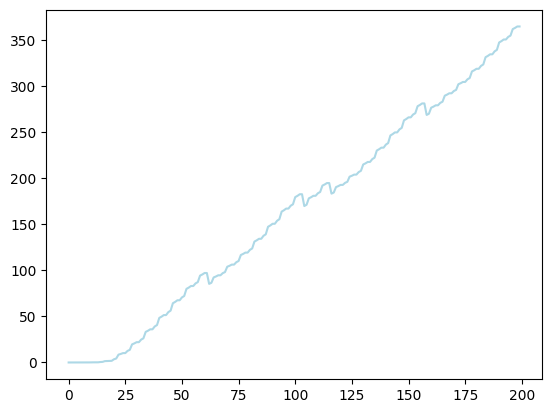

In [268]:
fig, ax = plt.subplots()
num=range(0,len(tlist))
ax.plot(num,tlist,color="lightblue")
print(tlist)

In [ ]:
# Animation setup
fig, ax = plt.subplots()

ims = []
abs_max=[]
for i in range(len(sol.t)):
    im1 = ax.scatter(sol.y[0][i],sol.y[4][i],color="red")
    im2 = ax.scatter(sol.y[2][i],sol.y[6][i],color="blue")
    im4 = ax.plot(sol.y[2],sol.y[6],color="lightblue")
##    im3 = ax.scatter(sol.y[8][i],sol.y[9][i],color="yellow")
    ims.append([im1,im2])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
HTML(ani.to_jshtml())

In [259]:
def F(n,r,l):
    return -1*m[1]*(r[n]-r[n-1])/(np.sqrt((r[n]-r[n-1])**2+(l[n]-l[n-1])**2))**3-1*m[0]*(r[n]-r[n-2])/(np.sqrt((r[n]-r[n-2])**2+(l[n]-l[n-2])**2))**3

def xv(t,r0):
    x0,vx0,y0,vy0=r0
    t2=[int(i) for i in t]
    print(t2)
    x1=[sol.y[0][int(i)] for i in t2]
    x2=[sol.y[2][int(i)] for i in t2]
    y1=[sol.y[4][int(i)] for i in t2]
    y2=[sol.y[6][int(i)] for i in t2]
    x=[x0,x1,x2]
    y=[y0,y1,y2]
    
    dydt=[vx0,F(0,x,y),
          vy0,F(0,y,x),
          ]
    return dydt


x0=(1496+(408+6378)*10**-5,0,
    0,37.8*24*60*60*10**-5)


sol2 = solve_ivp(xv, t_span=(0, 365), y0=x0,t_eval=np.linspace(0,365,365),rtol = 1.e-6)

print(sol2)

# Animation setup
fig, ax = plt.subplots()

ims = []
abs_max=[]
for i in range(len(sol.t)):
    im1 = ax.scatter(sol.y[0][i],sol.y[4][i],color="red")
    im2 = ax.scatter(sol.y[2][i],sol.y[6][i],color="blue")
    im4 = ax.plot(sol.y[2],sol.y[6],color="lightblue")
    im3 = ax.scatter(sol2.y[0][i],sol2.y[2][i],color="yellow")
    ims.append([im1,im2,im3,im4])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
HTML(ani.to_jshtml())

TypeError: 'float' object is not iterable